In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob

In [2]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_3/inputs'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_3/outputs'

In [13]:
def counts_to_rpkm(feature_counts_table):
    counts = feature_counts_table.ix[:,5:]
    lengths = feature_counts_table['Length']
    mapped_reads = counts.sum()
    return (counts * pow(10,9)).div(mapped_reads, axis=1).div(lengths, axis=0)

def counts_to_tpm(counts_table):
    """
    simple function that converts a featureCounts pandas Dataframe
    into a TPM dataframe.
    
    :param counts_table: pandas.DataFrame() 
        either a featureCounts table (first five cols contain non-count info,
        the rest contain raw counts) or a generic counts table (use skip_col=0
        in this case)
    :return tpm: pandas.DataFrame
    """
    rpkm = counts_to_rpkm(counts_table)
    tpm = rpkm.div(rpkm.sum())*pow(10,6)
    return tpm

exprs = pd.read_csv('/home/bay001/projects/kris_apobec_20200121/permanent_data/20191003_riboseq/featurecounts/counts.txt', sep='\t', skiprows=1, index_col=0)
exprs_tpm = counts_to_tpm(exprs)
exprs_tpm.columns = [c.replace('results/','').replace('.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam','') for c in exprs_tpm.columns]
# exprs_tpm.reset_index(inplace=True)
# exprs_tpm['ensembl_gene_id'] = exprs_tpm['Geneid'].apply(lambda x: x.split('.')[0])
exprs_tpm.head()

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,ABCE1-0_S1_L001_R1_001,ABCE1-1000_S15_L002_R1_001,ABCE1-50_S8_L001_R1_001,ApoControl-0_S7_L001_R1_001,ApoControl-1000_S21_L002_R1_001,ApoControl-50_S14_L002_R1_001,ETF1-0_S2_L001_R1_001,ETF1-1000_S16_L002_R1_001,ETF1-50_S9_L001_R1_001,GSTP1-0_S3_L001_R1_001,...,GSTP1-50_S10_L001_R1_001,RBFOX2-0_S6_L001_R1_001,RBFOX2-1000_S20_L002_R1_001,RBFOX2-50_S13_L002_R1_001,RPS2-0_S4_L001_R1_001,RPS2-1000_S18_L002_R1_001,RPS2-50_S11_L001_R1_001,RPS3-0_S5_L001_R1_001,RPS3-1000_S19_L002_R1_001,RPS3-50_S12_L001_R1_001
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.070537,0.000000,0.123994,0.00000,0.000000,0.0
ENSG00000227232.4,10.240494,10.264296,10.444137,11.724332,10.419771,11.116508,14.611874,4.946735,9.586328,10.116434,...,12.753053,10.696437,5.996374,14.275477,15.057067,4.642864,16.017543,11.88379,10.625329,0.0
ENSG00000243485.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
ENSG00000237613.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
ENSG00000268020.2,0.129576,0.000000,0.378935,0.000000,0.000000,0.000000,0.166592,0.437515,0.723608,0.447375,...,0.101886,0.000000,1.125100,0.123029,0.000000,0.733435,0.000000,0.00000,0.000000,0.0


In [14]:
exprs_tpm.columns

Index(['ABCE1-0_S1_L001_R1_001', 'ABCE1-1000_S15_L002_R1_001',
       'ABCE1-50_S8_L001_R1_001', 'ApoControl-0_S7_L001_R1_001',
       'ApoControl-1000_S21_L002_R1_001', 'ApoControl-50_S14_L002_R1_001',
       'ETF1-0_S2_L001_R1_001', 'ETF1-1000_S16_L002_R1_001',
       'ETF1-50_S9_L001_R1_001', 'GSTP1-0_S3_L001_R1_001',
       'GSTP1-1000_S17_L002_R1_001', 'GSTP1-50_S10_L001_R1_001',
       'RBFOX2-0_S6_L001_R1_001', 'RBFOX2-1000_S20_L002_R1_001',
       'RBFOX2-50_S13_L002_R1_001', 'RPS2-0_S4_L001_R1_001',
       'RPS2-1000_S18_L002_R1_001', 'RPS2-50_S11_L001_R1_001',
       'RPS3-0_S5_L001_R1_001', 'RPS3-1000_S19_L002_R1_001',
       'RPS3-50_S12_L001_R1_001'],
      dtype='object')

In [38]:
exprs_rps_apo = exprs_tpm[exprs_tpm[['RPS2-1000_S18_L002_R1_001', 'ApoControl-1000_S21_L002_R1_001']].sum(axis=1) > 0][['RPS2-1000_S18_L002_R1_001', 'ApoControl-1000_S21_L002_R1_001']]
print(exprs_rps_apo.shape[0])
print(exprs_rps_apo.corr())
exprs_rps_apo.head()

27328
                                 RPS2-1000_S18_L002_R1_001  \
RPS2-1000_S18_L002_R1_001                         1.000000   
ApoControl-1000_S21_L002_R1_001                   0.981646   

                                 ApoControl-1000_S21_L002_R1_001  
RPS2-1000_S18_L002_R1_001                               0.981646  
ApoControl-1000_S21_L002_R1_001                         1.000000  


,RPS2-1000_S18_L002_R1_001,ApoControl-1000_S21_L002_R1_001
Geneid,,
ENSG00000227232.4,4.642864,10.419771
ENSG00000268020.2,0.733435,0.000000
ENSG00000239906.1,0.000000,0.928801
ENSG00000241860.2,0.016017,0.290559
ENSG00000228463.4,0.100378,0.075873


In [25]:
scores = pd.read_csv(os.path.join(input_dir, 'scored_edits.txt'), sep='\t', index_col=0)
scores = scores[['RPS2-1000_S18_L002_R1_001', 'ApoControl-1000_S21_L002_R1_001']]
print(scores.shape[0])
print(scores.columns)
scores.head()

13341
Index(['RPS2-1000_S18_L002_R1_001', 'ApoControl-1000_S21_L002_R1_001'], dtype='object')


,RPS2-1000_S18_L002_R1_001,ApoControl-1000_S21_L002_R1_001
Geneid,,
ENSG00000000003.10,0.028695,0.000859
ENSG00000000419.8,0.016719,0.000662
ENSG00000000457.9,0.000785,0.000000
ENSG00000000460.12,0.008655,0.000556
ENSG00000001036.9,0.013696,0.000743


In [32]:
merged = pd.merge(exprs_rps_apo, scores, how='inner', left_index=True, right_index=True)
merged.head()

,RPS2-1000_S18_L002_R1_001_x,ApoControl-1000_S21_L002_R1_001_x,RPS2-1000_S18_L002_R1_001_y,ApoControl-1000_S21_L002_R1_001_y
Geneid,,,,
ENSG00000187634.6,11.052328,29.735044,0.000840,0.000387
ENSG00000188976.6,52.827126,80.647017,0.003532,0.000124
ENSG00000187961.9,21.890496,64.625001,0.001119,0.000339
ENSG00000188290.6,534.279192,1016.287777,0.001099,0.000345
ENSG00000187608.5,12.420354,19.128153,0.000853,0.000000


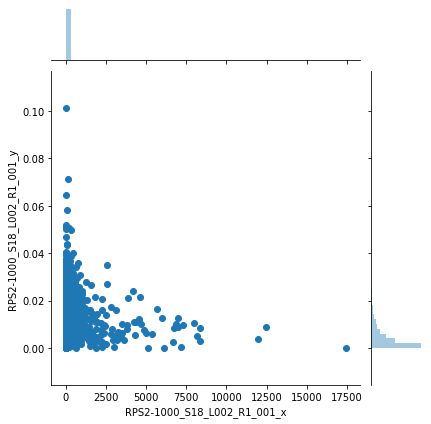

In [36]:
sns.jointplot(x='RPS2-1000_S18_L002_R1_001_x',y='RPS2-1000_S18_L002_R1_001_y', data=merged)

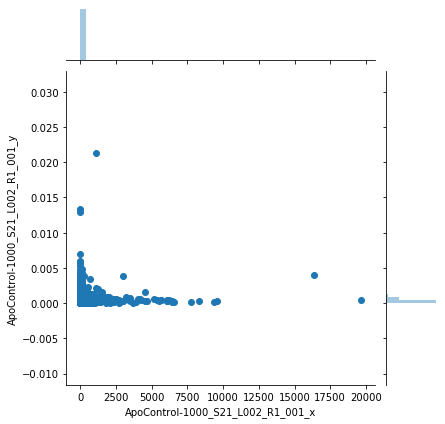

In [37]:
sns.jointplot(x='ApoControl-1000_S21_L002_R1_001_x',y='ApoControl-1000_S21_L002_R1_001_y', data=merged)